In [43]:
# Import libraries
import pandas as pd
import sys
import os
import warnings
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import STL

# Set options for displaying dataframes and figures
pd.set_option('display.max_columns', None)

# Add the path to the module to the system path
module_path = os.path.join(os.getcwd(), "module_data_prep_forecast")
sys.path.append(module_path)
import data_preparation_forecasting

# Ignore the FutureWarning temporarily
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

# EDA Forecasting

In below code of the notebook, the obtained time series for the three categories will be investigated in an exploratory manner. This includes checking whether the time-series display any systematic components such as trends or seasonality, in order to establish an idea of the modeling possibilities. 

## Explore the time-series

In [44]:
# Call the main function to obtain the dataframes
df_list = data_preparation_forecasting.main()

In [45]:
# Store the dataframes accordingly
df_footwear = df_list[0]
df_games = df_list[1]
df_sports = df_list[2]

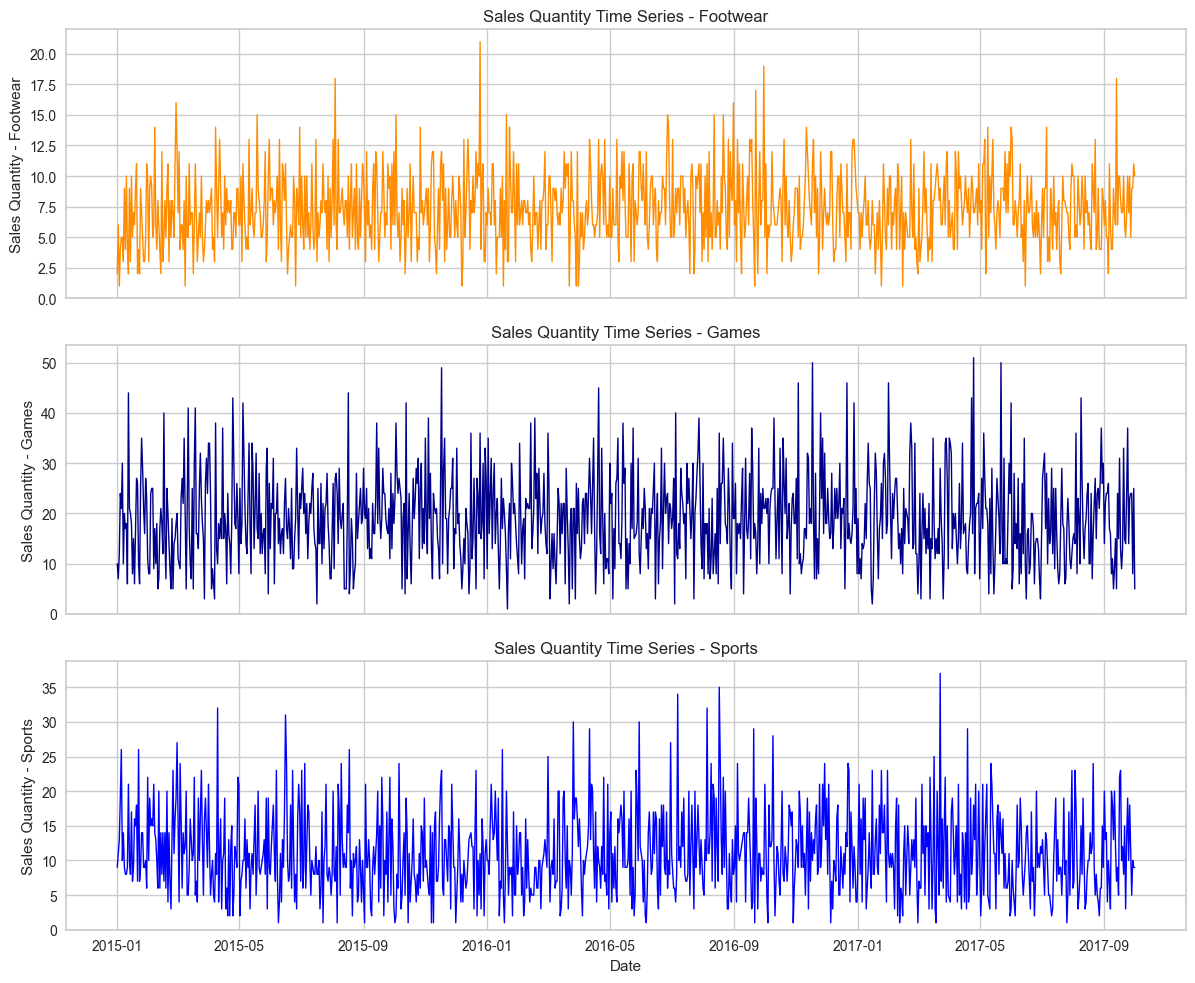

In [46]:
# Define the figure size and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plotting the time-series for fanshop products
ax1.plot(df_footwear['Sales_Qty'], color = 'darkorange', linewidth = 1.0)
ax1.set_ylabel('Sales Quantity - Footwear')
ax1.set_title('Sales Quantity Time Series - Footwear')
ax1.set_ylim(bottom=0)
ax1.grid(True)

# Plotting the time-series for apparel products
ax2.plot(df_games['Sales_Qty'], color = 'darkblue', linewidth = 1.0)
ax2.set_ylabel('Sales Quantity - Games')
ax2.set_title('Sales Quantity Time Series - Games')
ax2.set_ylim(bottom=0)
ax2.grid(True)

# Plotting the time-series for golf products
ax3.plot(df_sports['Sales_Qty'], color = 'blue', linewidth = 1.0)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sales Quantity - Sports')
ax3.set_title('Sales Quantity Time Series - Sports')
ax3.set_ylim(bottom=0)
ax3.grid(True)

plt.tight_layout()
plt.show()

**Interpretation:** all three time series do not display trends.

### Decompose the time-series

#### 1. Fanshop Data

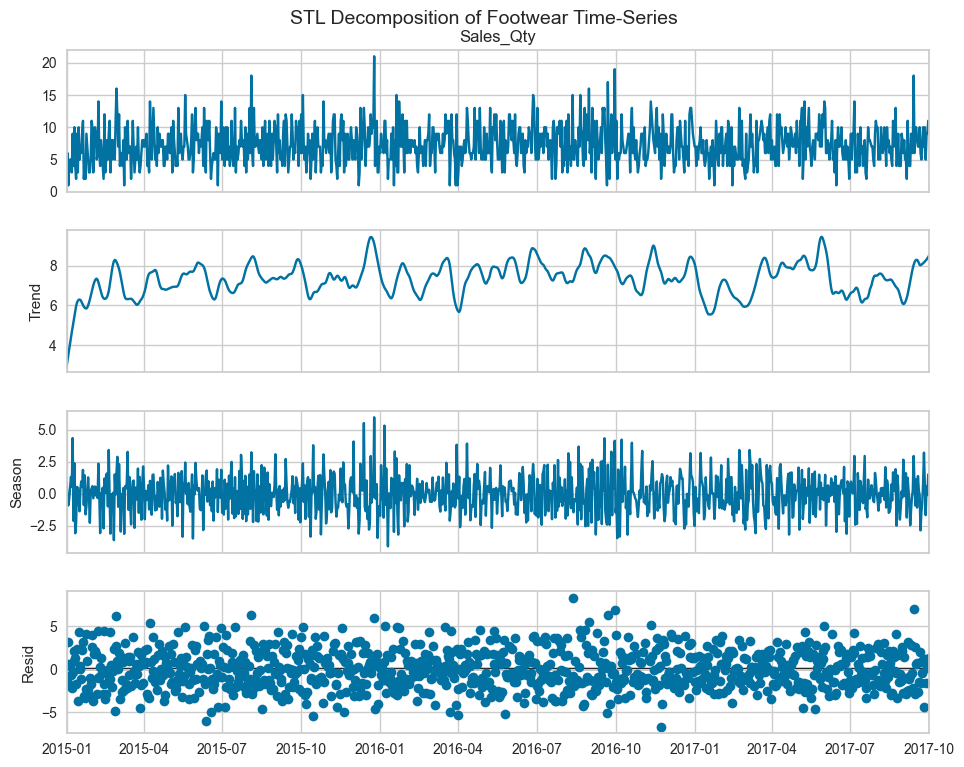

In [47]:
# Decomposition of the footwear data
stl_decomposition_footwear = STL(df_footwear['Sales_Qty'], period = 12).fit()
fig = stl_decomposition_footwear.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Footwear Time-Series", fontsize=14)
plt.show()

#### 2. Apparel Data

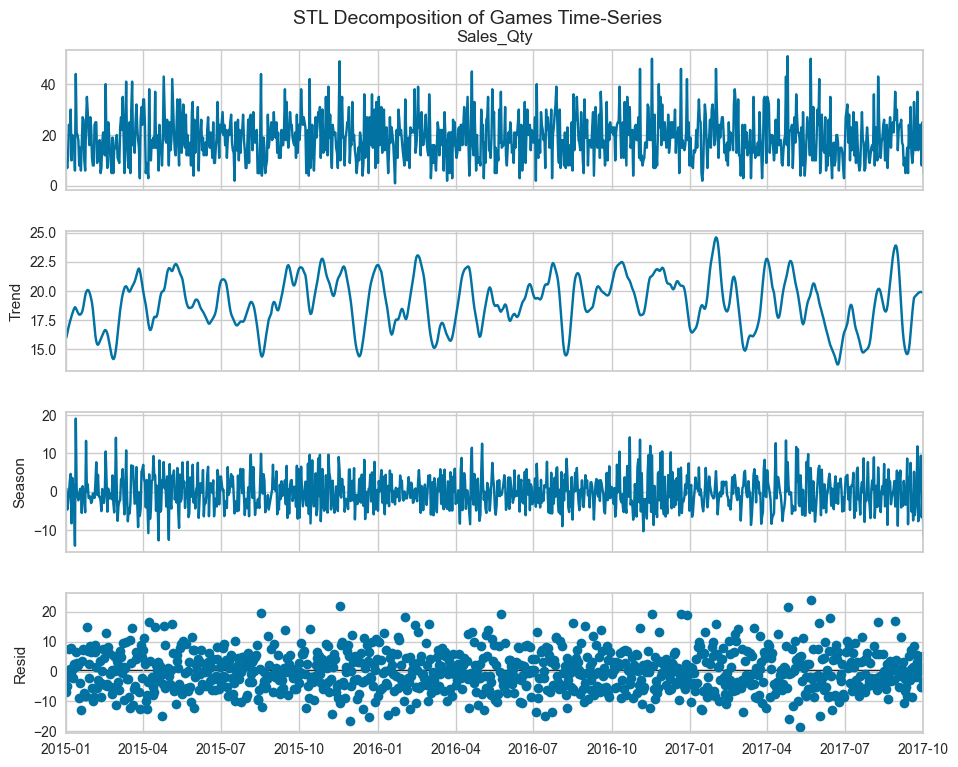

In [48]:
# Decomposition of the apparel data
stl_decomposition_games = STL(df_games['Sales_Qty'], period = 12).fit()
fig = stl_decomposition_games.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Games Time-Series", fontsize=14)
plt.show()

#### 3. Golf Data

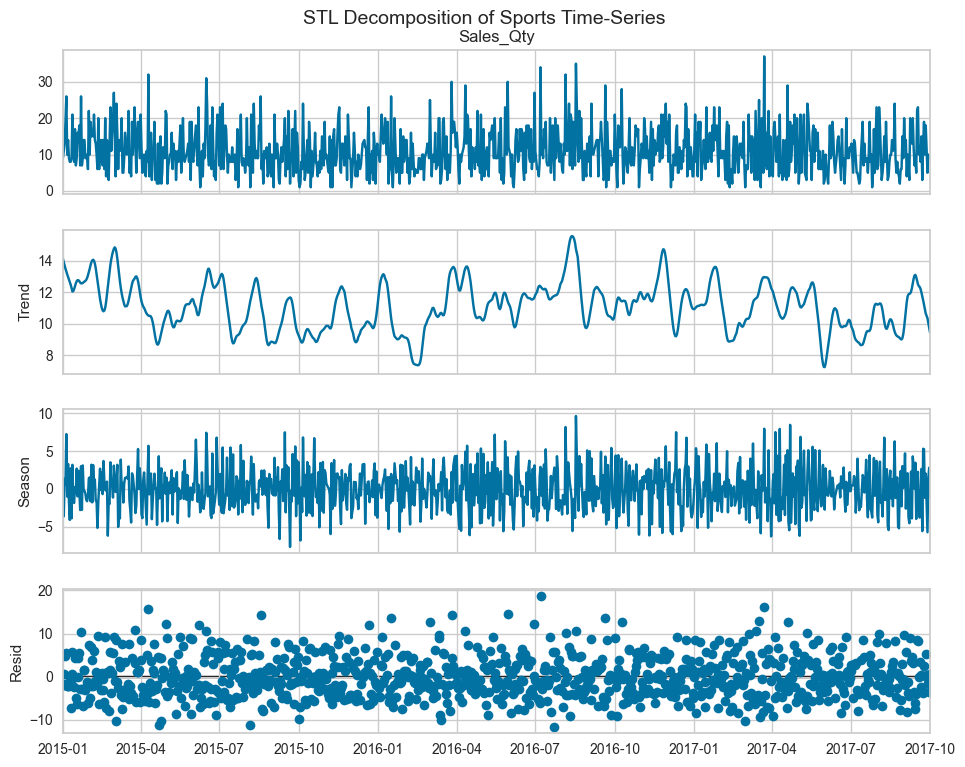

In [49]:
# Decomposition of the golf data
stl_decomposition_sports = STL(df_sports['Sales_Qty'], period = 12).fit()
fig = stl_decomposition_sports.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Sports Time-Series", fontsize=14)
plt.show()

# Forecasting

In [50]:
import pycaret
from pycaret.time_series import *

In [51]:
# Setup the forecasting: 3-fold cross-validation where we have by default an ExpandingWindowSplitter
# We want to forecast (fh = 60) 60 days in the future, so roughly 2 months, then session id for reproduceability 
setup_footwear = setup(df_footwear["Sales_Qty"], fold = 3, fh = 60, session_id = 123)

ValueError: You must pass a freq argument as current index has none.

In [13]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1005.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,31.569154
3,Summary,Statistics,Transformed,Median,,31.0
4,Summary,Statistics,Transformed,Standard Deviation,,11.413822
5,Summary,Statistics,Transformed,Variance,,130.275342
6,Summary,Statistics,Transformed,Kurtosis,,-0.014826
7,Summary,Statistics,Transformed,Skewness,,0.437685
8,Summary,Statistics,Transformed,# Distinct Values,,62.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",35.294815


In [15]:
plot_model(plot = "train_test_split")

In [16]:
plot_model(plot = "cv")

In [26]:
# Plot diagnostics for the model
plot_model(plot="diagnostics")

In [27]:
best_fanshop = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,0.7038,0.6983,8.7533,11.0222,0.3549,0.2875,-0.0434,0.6500
auto_arima,Auto ARIMA,0.7045,0.6997,8.7623,11.0435,0.3560,0.2876,-0.0475,45.7633
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7112,0.7013,8.8450,11.0694,0.3605,0.2899,-0.0527,1.7467
theta,Theta Forecaster,0.7116,0.6985,8.8497,11.0234,0.3648,0.2895,-0.0443,0.0833
polytrend,Polynomial Trend Forecaster,0.7160,0.7042,8.9048,11.1147,0.3727,0.2915,-0.0598,0.0200
ets,ETS,0.7161,0.7015,8.9060,11.0708,0.3706,0.2910,-0.0524,0.9400
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.7163,0.6978,8.9082,11.0127,0.3767,0.2910,-0.0374,2.0533
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7178,0.7032,8.9278,11.0987,0.3718,0.2919,-0.0559,1.7067
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7179,0.7057,8.9286,11.1379,0.3677,0.2917,-0.0673,2.3467
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7192,0.7042,8.9445,11.1147,0.3723,0.2924,-0.0598,1.7200


In [42]:
predict_model(best_fanshop, fh = 60)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Grand Means Forecaster,0.7111,0.6801,8.7485,10.6338,0.3264,0.2833,-0.0016


,y_pred
2017-08-03,31.5439
2017-08-04,31.5439
2017-08-05,31.5439
2017-08-06,31.5439
2017-08-07,31.5439
2017-08-08,31.5439
2017-08-09,31.5439
2017-08-10,31.5439
2017-08-11,31.5439
2017-08-12,31.5439


In [43]:
finalize_best_fanshop = finalize_model(best_fanshop)

In [46]:
plot_model(best_fanshop, plot = "forecast")

In [34]:
# If you specifically want to use auto_arima, you can create the model
auto_arima_model = create_model('auto_arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-02-03,0.8030,0.8004,10.0257,12.6964,0.4543,0.3333,0.0031
1,2017-04-04,0.5890,0.5907,7.3268,9.3225,0.2337,0.2237,-0.0450
2,2017-06-03,0.7215,0.7079,8.9344,11.1117,0.3800,0.3059,-0.1006
Mean,NaT,0.7045,0.6997,8.7623,11.0435,0.3560,0.2876,-0.0475
SD,NaT,0.0882,0.0858,1.1085,1.3782,0.0917,0.0466,0.0424


In [36]:
final_best_fanshop = finalize_model(auto_arima_model)

In [38]:
plot_model(final_best_fanshop, plot = "forecast")